# Using Data Analysis Techniques and Machine Learning to Search for Dark Matter (IN PROGRESS)

## Introduction, etc. here

In [1]:
import pandas as pd #So we can store data in DataFrames (an object type that makes for easier analysis)
import numpy as np #used for calculations
import uproot3 #allows us to accesss the data within the files we are using
import matplotlib.pyplot as plt #used for plotting graphs

Data from: https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC/

In [12]:
#relevant_data_keys = [b'mcWeight',b'lep_truthMatched',b'lep_trigMatched',b'lep_pt',b'lep_eta',b'lep_phi',b'lep_E',b'lep_z0',
#                 b'lep_charge',b'lep_type',b'lep_isTightID',b'lep_ptcone30',b'lep_etcone20',b'lep_trackd0pvunbiased',
#                 b'lep_tracksigd0pvunbiased',b'met_et',b'met_phi',b'jet_pt',b'jet_eta',b'jet_phi',b'jet_E',b'jet_jvt',
#                 b'lep_pt_syst',b'XSection',b'SumWeights',b'jet_MV2c10',b'scaleFactor_PILEUP',b'scaleFactor_ELE',
#                 b'scaleFactor_MUON',b'scaleFactor_LepTRIGGER']

keys = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_306109.dmV_Zll_MET40_DM1_MM800.exactly2lep.root')["mini"].keys()
#holds column name data in byte form (for reading in data)


relevant_data = ['mcWeight','lep_truthMatched','lep_trigMatched','lep_pt','lep_eta','lep_phi','lep_E','lep_z0','lep_charge',
                 'lep_type','lep_isTightID','lep_ptcone30','lep_etcone20','lep_trackd0pvunbiased','lep_tracksigd0pvunbiased',
                 'met_et','met_phi','jet_pt','jet_eta','jet_phi','jet_E','jet_jvt','lep_pt_syst','XSection','SumWeights'
                ,'jet_MV2c10','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER']#,
                #'scaleFactor_BTAG']
# these are the headings of the columns of data that we will be looking at

relevant_data_locations = [3,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,63,68,69,40,4,5,6,10]#,9]
#these are the numbers correseponding to where the headings are in the order of all the headings in the file

In [11]:
len(relevant_data_keys)

30

In [3]:
#### Variables we are using:
varnames = ['mcWeight', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'lep_pt_syst', 'XSection', 'SumWeights', 'jet_MV2c10', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_LepTRIGGER']
for i in varnames:
    print(i)

mcWeight
lep_truthMatched
lep_trigMatched
lep_pt
lep_eta
lep_phi
lep_E
lep_z0
lep_charge
lep_type
lep_isTightID
lep_ptcone30
lep_etcone20
lep_trackd0pvunbiased
lep_tracksigd0pvunbiased
met_et
met_phi
jet_pt
jet_eta
jet_phi
jet_E
jet_jvt
lep_pt_syst
XSection
SumWeights
jet_MV2c10
scaleFactor_PILEUP
scaleFactor_ELE
scaleFactor_MUON
scaleFactor_LepTRIGGER


## FIRST WE'LL PUT IN THE BG MC

In [13]:
#ZZ background MC
llvv_dict = {}
#llvv_open = 
counter = 0
for i in relevant_data_locations:
    llvv_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363492.llvv.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
llvv_df = pd.DataFrame(llvv_dict)

## DONT WORK WITH ANY OF THE BELOW CELLS OPENING THE BG MC (for now) - FOR THE SAKE OF YOUR PC

In [11]:
#WZ background MC
lllv_dict = {}
counter = 0
for i in relevant_data_locations:
    lllv_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363491.lllv.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
lllv_df = pd.DataFrame(lllv_dict)
    
lvvv_dict = {}
counter = 0
for i in relevant_data_locations:
    lvvv_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363493.lvvv.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
lvvv_df = pd.DataFrame(lvvv_dict)
    
WlvZqq_dict = {}
counter = 0
for i in relevant_data_locations:
    WlvZqq_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363489.WlvZqq.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
WlvZqq_df = pd.DataFrame(WlvZqq_dict)
    
WqqZll_dict = {}
counter = 0
for i in relevant_data_locations:
    WqqZll_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363358.WqqZll.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
WqqZll_df = pd.DataFrame(WqqZll_dict)

In [ ]:
#Z+jets backgorund MC
Zee_dict = {}
counter = 0
for i in relevant_data_locations:
    Zee_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361106.Zee.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Zee_df = pd.DataFrame(Zee_dict)

Zmumu_dict = {}
counter = 0
for i in relevant_data_locations:
    Zmumu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361107.Zmumu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Zmumu_df = pd.DataFrame(Zmumu_dict)

In [ ]:
#top background MC
single_top_tchan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_top_tchan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410011.single_top_tchan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_top_tchan_df = pd.DataFrame(single_top_tchan_dict)

single_antitop_tchan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_antitop_tchan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410012.single_antitop_tchan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_antitop_tchan_df = pd.DataFrame(single_antitop_tchan_dict)

single_top_wtchan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_top_wtchan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410013.single_top_wtchan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_top_wtchan_df = pd.DataFrame(single_top_wtchan_dict)

single_antitop_wtchan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_antitop_wtchan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410014.single_antitop_wtchan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_antitop_wtchan_df = pd.DataFrame(single_antitop_wtchan_dict)

single_top_schan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_top_schan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410025.single_top_schan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_top_schan_df = pd.DataFrame(single_top_schan_dict)

single_antitop_schan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_antitop_schan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410026.single_antitop_schan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_antitop_schan_df = pd.DataFrame(single_antitop_schan_dict)

In [ ]:
#Ztt (Ztautau) background MC
Ztautau_dict = {}
counter = 0
for i in relevant_data_locations:
    Ztautau_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361108.Ztautau.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Ztautau_df = pd.DataFrame(Ztautau_dict)

In [ ]:
#WW background MC
WpqqWmlv_dict = {}
counter = 0
for i in relevant_data_locations:
    WpqqWmlv_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363359.WpqqWmlv.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
WpqqWmlv_df = pd.DataFrame(WpqqWmlv_dict)

WplvWmqq_dict = {}
counter = 0
for i in relevant_data_locations:
    WplvWmqq_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363360.WplvWmqq.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
WplvWmqq_df = pd.DataFrame(WplvWmqq_dict)

In [ ]:
#W+jets background MC
Wplusenu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wplusenu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361100.Wplusenu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wplusenu_df = pd.DataFrame(Wplusenu_dict)

Wplusmunu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wplusmunu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361101.Wplusmunu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wplusmunu_df = pd.DataFrame(Wplusmunu_dict)

Wplustaunu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wplustaunu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361102.Wplustaunu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wplustaunu_df = pd.DataFrame(Wplustaunu_dict)

Wminusenu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wminusenu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361103.Wminusenu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wminusenu_df = pd.DataFrame(Wminusenu_dict)

Wminusmunu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wminusmunu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361104.Wminusmunu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wminusmunu_df = pd.DataFrame(Wminusmunu_dict)

Wminustaunu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wminustaunu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361105.Wminustaunu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wminustaunu_df = pd.DataFrame(Wminustaunu_dict)

In [ ]:
#ttV background MC
ttW_dict = {}
counter = 0
for i in relevant_data_locations:
    ttW_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410155.ttW.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
ttW_df = pd.DataFrame(ttW_dict)
    
ttee_dict = {}
counter = 0
for i in relevant_data_locations:
    ttee_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410218.ttee.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
ttee_df = pd.DataFrame(ttee_dict)
    
ttmumu_dict = {}
counter = 0
for i in relevant_data_locations:
    ttmumu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410219.ttmumu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
ttmumu_df = pd.DataFrame(ttmumu_dict)

## CONTINUE AS NORMAL USING ONLY ONE BG MC (FOR ZZ)

We need to add a total weights column to the signal and background MC to be able tof find the signal to background ratio

In [14]:
llvv_df

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,jet_E,jet_jvt,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER
0,0.104969,"[True, True]","[True, True]","[66719.21, 38223.332]","[0.3023575, 1.4662564]","[2.448181, -2.912213]","[69792.25, 87221.34]","[0.025497437, 0.060962677]","[1, -1]","[11, 13]",...,"[502564.0, 195443.3, 81640.984, 38168.805, 795...","[0.9954332, 0.98083514, 0.99522156, 0.7396009,...","[114.96441, 253.74883]",12.466,5039260.0,"[-0.4067991, -0.84126496, -0.9187099, -0.73590...",0.351687,0.977380,1.001090,1.000560
1,0.643866,"[False, True]","[True, True]","[29149.914, 29030.73]","[1.1029727, -0.051655646]","[1.4237683, 1.1282893]","[48753.13, 29069.662]","[-0.07538986, 0.018318176]","[-1, 1]","[11, 13]",...,[32463.81],[1.0],"[150.17276, 74.33821]",12.466,5039260.0,[-0.3509991],1.087349,0.950550,0.994404,0.977310
2,0.138019,"[True, True]","[True, True]","[52254.113, 43302.742]","[-0.6182232, -1.7384257]","[2.9409459, -0.19445567]","[62562.0, 126967.55]","[0.048130035, 0.039821625]","[1, -1]","[11, 13]",...,[39832.88],[0.997857],"[55.403984, 259.87164]",12.466,5039260.0,[-0.9265425],1.745631,0.966600,0.986746,0.954980
3,1.000000,"[True, True]","[True, True]","[33380.016, 29918.826]","[0.24622504, 0.042297646]","[-2.3398328, 1.883797]","[34397.0, 29945.594]","[0.1483388, 0.0696311]","[1, -1]","[11, 11]",...,[],[],"[23.30728, 153.75331]",12.466,5039260.0,[],1.554649,0.914097,1.000000,0.948390
4,0.128125,"[True, True]","[True, True]","[36902.188, 31770.463]","[1.1146672, 1.0253009]","[0.70942724, -0.66114825]","[62301.645, 49984.83]","[0.010108948, -0.0099487305]","[-1, 1]","[13, 11]",...,"[90056.37, 58171.625]","[0.99199384, 0.98889524]","[160.68677, 218.34625]",12.466,5039260.0,"[-0.82874006, -0.5805102]",1.241677,0.957340,1.000304,0.972560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389175,0.119263,"[True, True]","[True, True]","[118607.414, 94439.586]","[1.1818022, 0.44610128]","[-1.1370046, -1.8491415]","[211534.53, 103993.5]","[0.009380341, 0.021263123]","[1, -1]","[11, 11]",...,"[1563718.5, 115188.61]","[0.99653107, 0.99660873]","[809.8102, 626.6323]",12.466,5039260.0,"[-0.9509517, -0.85260785]",0.619412,0.955238,1.000000,0.995440
3389176,0.100000,"[True, True]","[False, True]","[102127.46, 88736.11]","[-0.74553764, -2.051576]","[-1.5200887, 1.5907942]","[131849.31, 350892.94]","[0.06912804, 0.061903954]","[-1, 1]","[13, 11]",...,[49564.688],[0.97973734],"[4215.5737, 518.52686]",12.466,5039260.0,[-0.70130503],0.553627,0.981780,0.993241,0.996040
3389177,0.100605,"[True, False]","[True, False]","[103310.0, 13661.678]","[0.8652747, 0.21771964]","[-2.5068283, -2.1389017]","[144458.12, 13987.152]","[-0.0015878677, -0.1763823]","[1, -1]","[13, 13]",...,"[136017.42, 30777.084]","[0.9993637, 0.75295997]","[382.5321, 122.845085]",12.466,5039260.0,"[-0.88155055, -0.6659488]",0.553627,1.000000,0.993054,0.911874
3389178,1.000000,"[True, True]","[True, True]","[35255.027, 25063.988]","[-1.6233085, -0.8550777]","[-2.5809143, -0.1815377]","[92845.61, 34798.934]","[-0.104314804, 0.043174744]","[-1, 1]","[13, 11]",...,[],[],"[169.79926, 126.50499]",12.466,5039260.0,[],0.351687,0.947070,0.974256,1.013708


In [15]:
df_names = [llvv_df]#[raw_data_df, llvv_df, lllv_df, lvvv_df, WlvZqq_df, WqqZll_df, Zee_df, Zmumu_df, single_top_tchan_df, 
            #single_antitop_tchan_df, single_top_wtchan_df, single_antitop_wtchan_df, single_top_schan_df, 
            #single_antitop_schan_df, Ztautau_df, WpqqWmlv_df, WplvWmqq_df, Wplusenu_df, Wplusmunu_df, Wplustaunu_df,
            #Wminusenu_df, Wminusmunu_df, Wminustaunu_df, ttW_df, ttee_df, ttmumu_df]

#IN ORDER TO FIND THE TOTAL WEIGHT WE WILL NEED TO DO CALCULATIONS ON ALL THE DATA. THUS WE WILL MAKE A FUNCTION THAT CAN BE
#APPLIED TO ALL DATA USING NP.VECTORISE

def add_xsecW(dfname):
    dfname['XSectionWeight'] = 10*1000*dfname['XSection']/dfname['SumWeights'] 
#10 refers to amount of data we have(10 fb-1), *1000 converts from fb-1 to pb-1

for i in df_names:
    add_xsecW(i)
    
    
def add_Weight(dfname):    
    dfname['Weight'] = dfname['XSectionWeight']*dfname['mcWeight']*dfname['scaleFactor_PILEUP']*dfname['scaleFactor_ELE']*dfname['scaleFactor_MUON']*dfname['scaleFactor_LepTRIGGER']

for i in df_names:
    add_Weight(i)    

#mc_sig = 0
#mc_bg = 0
#for i in range(len(df_names)):
#    if i == 0: #if its the MC signal
#        mc_sig += raw_data_df['SumWeights'][0] #all values are the same
#    else:
#        mc_bg += llvv_df['SumWeights'][0]

In [16]:
new_relevant_data = ['mcWeight','lep_truthMatched','lep_trigMatched','lep_pt','lep_eta','lep_phi','lep_E','lep_z0','lep_charge',
                 'lep_type','lep_isTightID','lep_ptcone30','lep_etcone20','lep_trackd0pvunbiased','lep_tracksigd0pvunbiased',
                 'met_et','met_phi','jet_pt','jet_eta','jet_phi','jet_E','jet_jvt','lep_pt_syst','XSection','SumWeights'
                ,'jet_MV2c10','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER',
                     'XSectionWeight','Weight']

In [18]:
#mc_sig = 0
mc_bg = 0
#for i in range(len(df_names)):
#    if i==0:
#        mc_sig += np.sum((df_names[i])['Weight'])
#    else:
#        mc_bg += np.sum((df_names[i])['Weight'])
mc_bg += np.sum((df_names[0])['Weight'])

## Pre Cut Plots

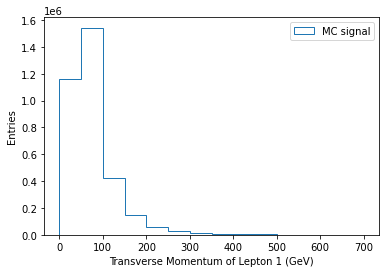

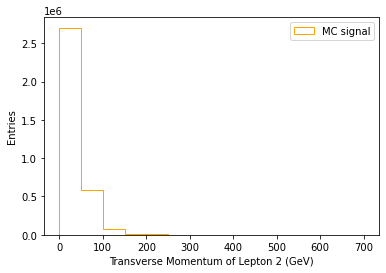

In [19]:
lep1PT = []
lep2PT = []
for i in llvv_df['lep_pt']:
    lep1PT.append(i[0]*0.001)#decrease by a factor of 10^3 for TeV -> GeV
    lep2PT.append(i[1]*0.001)
    
lep1PT_hist = plt.hist(lep1PT, bins=np.linspace(0,700,15), histtype='step', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 1 (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()
lep2PT_hist = plt.hist(lep2PT, bins=np.linspace(0,700,15), histtype='step', color='orange', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 2 (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()

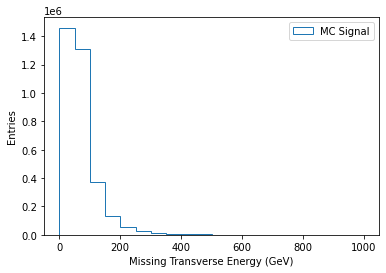

In [20]:
lepMET_hist = plt.hist(llvv_df['met_et']*0.001, bins=np.linspace(0,1000,21), histtype='step', label='MC Signal')
plt.xlabel('Missing Transverse Energy (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()

#### Make a dictionary to hold info on the how each cut changes the weight and number of events of the uncut data

In [ ]:
cut_info = {'Filename':['Signal_MM800'],'Original_eventNo':[5206],'Original_sumW':[24.41490936279297],
            'events_invMass_cut':[4944],'sumW_invMass_cut':[23.18094936111902],
            'events_charge_cut':[5146],'sumW_charge_cut':[24.136442950451055],
            'events_prapidity_cut':[5197],'sumW_prapidity_cut':[],
           'events_leppt_cut':[4429],'sumW_leppt_cut':[20.77366774802249],
            'events_met_cut':[3829],'sumW_met_cut':[20.77366774802249],
            'events_delR_cut':[3040],'sumW_delR_cut':[14.398952635076057],
            'events_delP_cut':[2105],'sumW_delP_cut':[9.93029888518231],
            'events_fracpt_cut':[3232],'sumW_fracpt_cut':[15.242639280918866],
            'events_EmHt_cut':[3449],'sumW_EmHt_cut':[16.274315198827935],
            'events_bjet_cut':[4777],'sumW_bjet_cut':[22.219027951784028],
            'events_jetpt_cut':[2529],'sumW_jetpt_cut':[11.914164089865153]}
           

In [ ]:
#code after each cut to find the significance of each cut
new_sumW = np.sum(new_cut_df['Weight'])
new_events = len(new_cut_df)
print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 1: ∆φ (azimuthal angle between Emiss and Z boson) greater than 2.7

In [22]:
#code to make the cut
#use met_phi
#calculate Z boson phi - look at inv mass variables
#phi = arctan(y/x)

desired_indexes = []#hold the indexes of the values that have an invariant mass within our desired range

for i in range(len(llvv_df['lep_eta'])):
    
    px_1 = llvv_df['lep_pt'][i][0]*np.cos(llvv_df['lep_phi'][i][0]) # x-momentum of lepton 1
    py_1 = llvv_df['lep_pt'][i][0]*np.sin(llvv_df['lep_phi'][i][0]) # y-momentum of lepton 1
    px_2 = llvv_df['lep_pt'][i][1]*np.cos(llvv_df['lep_phi'][i][1]) # x-momentum of lepton 2
    py_2 = llvv_df['lep_pt'][i][1]*np.sin(llvv_df['lep_phi'][i][1]) # y-momentum of lepton 2

    sumpx = px_1 + px_2 # x-momentum of combined system
    sumpy = py_1 + py_2 # y-momentum of combined system
    
    sumphi = np.arctan(sumpy/sumpx)
    
    phi_diff = llvv_df['met_phi'][i] - sumphi
    
    if abs(phi_diff)>2.7:
        desired_indexes.append(i)

len(desired_indexes)

936008

In [ ]:
#code to make a new df using label delP
delP_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(llvv_df[i][j])
    delP_cut_df[i] = kept_data
    
delP_cut_df
#new_sumW = np.sum(delP_cut_df['Weight'])
#new_events = len(delP_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 2: Events with one or more jets with $p_t$ > 25 GeV are removed

In [ ]:
desired_indexes = []

for i in range(len(delP_cut_df['jet_pt'])):
    check = []
    for j in delP_cut_df['jet_pt'][i]:
        if (j/1000) > 25:
            check.append('veto')
        else:
            check.append('keep')
    if 'veto' in check:
        continue
    else:
        desired_indexes.append(i)

len(desired_indexes)

In [ ]:
#code for df with label jetpt
jetpt_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(delP_cut_df[i][j])
    jetpt_cut_df[i] = kept_data
    
jetpt_cut_df
#new_sumW = np.sum(jetpt_cut_df['Weight'])
#new_events = len(jetpt_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 3: ∆R less than 1.8

In [ ]:
desired_indexes = []#hold the indexes of the values that have a pseudorapidity of less than 2.5 

for i in range(len(jetpt_cut_df['lep_eta'])):
    delta_eta = jetpt_cut_df['lep_eta'][i][0] - jetpt_cut_df['lep_eta'][i][1] # Δη between the 2 objects
    delta_phi = jetpt_cut_df['lep_phi'][i][0] - jetpt_cut_df['lep_phi'][i][1] # Δϕ between the 2 objects
    if delta_phi >= np.pi:
        delta_phi -= 2*np.pi # use π periodicity to get number between -π and π
    elif delta_phi < -np.pi: 
        delta_phi += 2*np.pi # use π periodicity to get number between -π and π
    if np.sqrt(delta_eta**2 + delta_phi**2) < 1.8: # check if ∆R for this object is below our desired threshold
        desired_indexes.append(i)

        
len(desired_indexes)

In [ ]:
delR_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(jetpt_cut_df[i][j])
    delR_cut_df[i] = kept_data
    
delR_cut_df
#new_sumW = np.sum(delR_cut_df['Weight'])
#new_events = len(delR_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 4: Fractional $p_t$ difference (between $E_{miss}$ + jets and leptons) below 0.2

In [ ]:
#(p_t(miss+jet) - p_t(leps)) / p_t(leps)
#p_t(miss+jet) = p_t(miss) + sum(p_t(jet))

desired_indexes = []
for i in range(len(delR_cut_df['met_et'])):
    ptMJ = (delR_cut_df['met_et'][i] + np.sum(delR_cut_df['jet_pt'][i]))/1000 
    #is met_et right variable, or do I need an extra calc? also divide by 1000 to go from MeV to GeV
    ptL = np.sum(delR_cut_df['lep_pt'][i])/1000 #also divide by 1000 to go from MeV to GeV
    
    if ((ptMJ - ptL)/ptL) < 0.2:
        desired_indexes.append(i)

len(desired_indexes)

In [ ]:
fracpt_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(delR_cut_df[i][j])
    fracpt_cut_df[i] = kept_data
    
fracpt_cut_df
#new_sumW = np.sum(fracpt_cut_df['Weight'])
#new_events = len(fracpt_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 5: $E_{miss}/{H_t}$ greater than 0.6

In [ ]:
#H_t = sum(p_tJet, p_tLep1, p_tLep2)
desired_indexes = []
#check = []
for i in range(len(fracpt_cut_df['lep_pt'])):
    Ht = np.sum(fracpt_cut_df['jet_pt'][i]) + np.sum(fracpt_cut_df['lep_pt'][i])
    #check.append((raw_data_df['met_et'][i]/Ht)/1000)
    if (fracpt_cut_df['met_et'][i]/Ht) > 0.6: # DON'T also divide by 1000 to go from MeV to GeV (why?)
        desired_indexes.append(i)
#print(check)
len(desired_indexes)

In [ ]:
EmHt_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(fracpt_cut_df[i][j])
    EmHt_cut_df[i] = kept_data
    
EmHt_cut_df
#new_sumW = np.sum(EmHt_cut_df['Weight'])
#new_events = len(EmHt_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 6: Missing transverse energy greater than 90 GeV

In [ ]:
desired_indexes = []#hold the indexes of the values that have a pseudorapidity of less than 2.5 

for i in range(len(EmHt_cut_df['met_et'])):
    if (EmHt_cut_df['met_et'][i])/1000 > 90: #divide by 1000 to go from MeV to GeV
        #if missing transverse energy is greater than 90 GeV
        desired_indexes.append(i)
        
len(desired_indexes)

In [ ]:
met_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(EmHt_cut_df[i][j])
    met_cut_df[i] = kept_data
    
met_cut_df
#new_sumW = np.sum(met_cut_df['Weight'])
#new_events = len(met_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 7: $\textbf p_{t}$ of leptons above 20 GeV, $\textbf p_{t}$ of leading lepton above 30 GeV

The leading lepton is the first one in the array (i.e. \[lepton 1, lepton 2])

(remember that data in the table is in MeV, not GeV)

In [ ]:
desired_indexes = []#hold the indexes of the values that have a pseudorapidity of less than 2.5 

for i in range(len(met_cut_df['lep_pt'])):
    if (met_cut_df['lep_pt'][i][0])/1000 > 30 and (met_cut_df['lep_pt'][i][1])/1000 > 20: 
        #if leading lepton has p_t above 30 GeV and second lepton has p_t above 20 GeV
        desired_indexes.append(i)
        
len(desired_indexes)

In [ ]:
leppt_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(met_cut_df[i][j])
    leppt_cut_df[i] = kept_data
    
leppt_cut_df
#new_sumW = np.sum(leppt_cut_df['Weight'])
#new_events = len(leppt_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 8: Veto events with 1 or more B-tagged jets

In [ ]:
desired_indexes = []
for i in range(len(leppt_cut_df['jet_MV2c10'])):
    check_b = []
    for j in leppt_cut_df['jet_MV2c10'][i]:
        if j > 0.1758:
            check_b.append('veto')
        if 'veto' in check_b:
            continue
        else:
            desired_indexes.append(i)
            
len(desired_indexes)

In [ ]:
#code to make df with label bjet
bjet_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(leppt_cut_df[i][j])
    bjet_cut_df[i] = kept_data
    
bjet_cut_df
#new_sumW = np.sum(bjet_cut_df['Weight'])
#new_events = len(bjet_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 9: Invariant mass of both leptons between 76-106 GeV

In [ ]:
desired_indexes = []#hold the indexes of the values that have an invariant mass within our desired range

for i in range(len(bjet_cut_df['lep_eta'])):
    
    px_1 = bjet_cut_df['lep_pt'][i][0]*np.cos(bjet_cut_df['lep_phi'][i][0]) # x-momentum of lepton 1
    py_1 = bjet_cut_df['lep_pt'][i][0]*np.sin(bjet_cut_df['lep_phi'][i][0]) # y-momentum of lepton 1
    pz_1 = bjet_cut_df['lep_pt'][i][0]*np.sinh(bjet_cut_df['lep_eta'][i][0]) # z-momentum of lepton 1
    px_2 = bjet_cut_df['lep_pt'][i][1]*np.cos(bjet_cut_df['lep_phi'][i][1]) # x-momentum of lepton 2
    py_2 = bjet_cut_df['lep_pt'][i][1]*np.sin(bjet_cut_df['lep_phi'][i][1]) # y-momentum of lepton 2
    pz_2 = bjet_cut_df['lep_pt'][i][1]*np.sinh(bjet_cut_df['lep_eta'][i][1]) # z-momentum of lepton 2

    sumpx = px_1 + px_2 # x-momentum of combined system
    sumpy = py_1 + py_2 # y-momentum of combined system
    sumpz = pz_1 + pz_2 # z-momentum of combined system
    sump = np.sqrt(sumpx**2 + sumpy**2 + sumpz**2) # total momentum of combined system
    sumE = bjet_cut_df['lep_E'][i][0] + bjet_cut_df['lep_E'][i][1] # total energy of combined system
    
    invM = np.sqrt(sumE**2 - sump**2)/1000 #This is the invariant mass. /1000 to go from MeV to GeV

    if invM>=76 and invM<=106:
        desired_indexes.append(i)

len(desired_indexes) #= 4944

In [ ]:
inv_mass_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(bjet_cut_df[i][j])
    inv_mass_cut_df[i] = kept_data
    
inv_mass_cut_df
#new_sumW = np.sum(inv_mass_cut_df['Weight'])
#new_events = len(inv_mass_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 10: Leptons should have opposite charge

The leptons from the event we are looking for will have opposite charge (i.e. one is a particle, the other an antiparticle).

In [20]:
inv_mass_cut_df['lep_charge']

0       [1, -1]
1       [1, -1]
2       [1, -1]
3       [-1, 1]
4       [-1, 1]
         ...   
4939    [-1, 1]
4940    [1, -1]
4941    [1, -1]
4942    [-1, 1]
4943    [1, -1]
Name: lep_charge, Length: 4944, dtype: object

In [35]:
desired_indexes = []

for i in range(len(inv_mass_cut_df['lep_charge'])):
    if inv_mass_cut_df['lep_charge'][i][0]!=inv_mass_cut_df['lep_charge'][i][1]:
    #you could directly check entries to ensure that they are 1/-1, but its safe to assume that they are all 1/-1
        desired_indexes.append(i)
len(desired_indexes)# = 4895

86

In [36]:
charge_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(inv_mass_cut_df[i][j])
    charge_cut_df[i] = kept_data
    
charge_cut_df
#new_sumW = np.sum(charge_cut_df['Weight'])
#new_events = len(charge_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
1,1.0,"[False, False]","[True, True]","[80566.04, 40651.81]","[-0.50567305, -0.945193]","[0.7670062, 2.4300175]","[91087.99, 60203.59]","[-0.006412506, -0.027975082]","[1, -1]","[11, 11]",...,"[438.1843, 276.48248]",0.005016,10000.0,[-0.69771194],1.241677,0.951882,1.000000,1.005820,0.005016,0.005963
2,1.0,"[True, True]","[True, True]","[273315.47, 87786.586]","[-0.07824924, -0.039545506]","[-0.2525574, 0.30324313]","[274152.66, 87855.234]","[0.0010147095, 0.19698334]","[-1, 1]","[11, 11]",...,"[2523.6602, 371.9531]",0.005016,10000.0,[-0.81007385],1.196105,0.955259,1.000000,1.005820,0.005016,0.005765
3,1.0,"[True, True]","[True, True]","[52290.363, 51501.23]","[0.2851906, 1.304794]","[-0.5924392, 0.8845451]","[54431.3, 101925.0]","[-0.024110794, 0.03438568]","[1, -1]","[11, 11]",...,"[76.561615, 273.74234]",0.005016,10000.0,[-0.8881999],1.262048,0.935552,1.000000,0.986530,0.005016,0.005843
4,1.0,"[True, True]","[True, False]","[219081.56, 186575.44]","[1.5738177, 1.1763239]","[0.5944067, 0.39386353]","[551240.56, 331250.06]","[0.09065628, 0.011795044]","[-1, 1]","[11, 11]",...,"[7727.241, 1963.0931]",0.005016,10000.0,[-0.8340585],1.320948,0.950287,1.000000,1.012650,0.005016,0.006376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.0,"[True, True]","[True, True]","[170990.61, 64351.613]","[-0.97658896, -1.4652532]","[0.7349716, 1.4120983]","[259219.8, 146710.73]","[0.032356262, -0.014808655]","[-1, 1]","[13, 13]",...,"[2249.319, 676.1867]",0.005016,10000.0,[-0.9584847],1.225855,1.000000,0.996970,1.044875,0.005016,0.006405
82,1.0,"[True, True]","[True, True]","[301375.06, 240123.73]","[-0.34055772, -0.653975]","[-0.80271816, -0.9324459]","[319021.3, 293328.56]","[0.06381607, -0.051200867]","[-1, 1]","[11, 11]",...,"[3919.9636, 1943.2767]",0.005016,10000.0,[-0.4826886],1.196105,0.979183,1.000000,1.005820,0.005016,0.005909
83,1.0,"[True, True]","[True, False]","[93762.51, 50549.484]","[-0.27314183, -0.62300164]","[1.0192267, -0.32223517]","[97281.95, 60680.824]","[-0.020568848, -0.06321907]","[1, -1]","[11, 11]",...,"[274.20563, 64.965385]",0.005016,10000.0,[-0.8472127],1.320948,0.951695,1.000000,1.005820,0.005016,0.006343
84,1.0,"[True, True]","[True, True]","[62197.527, 61060.7]","[-1.8207629, -0.64575624]","[1.72846, 0.9085938]","[197118.64, 74240.57]","[0.046380997, 0.0758276]","[1, -1]","[13, 13]",...,"[170.12497, 353.8311]",0.005016,10000.0,[-0.6203762],1.262048,1.000000,0.983084,1.004143,0.005016,0.006249


### Cut 11: Pseudorapidity of below 2.5

Note that this is only for the leptons

In [37]:
desired_indexes = []
for i in range(len(charge_cut_df['lep_eta'])):
    if charge_cut_df['lep_eta'][i][0] > 2.5: #HOW TO TREAT NEGATIVE VALUES??
        continue
    elif charge_cut_df['lep_eta'][i][1] > 2.5:
        continue
    else:
        desired_indexes.append(i)
len(desired_indexes)

86

In [39]:
prapidity_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(charge_cut_df[i][j])
    prapidity_cut_df[i] = kept_data
    
prapidity_cut_df
#new_sumW = np.sum(prapidity_cut_df['Weight'])
#new_events = len(prapidity_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
1,1.0,"[False, False]","[True, True]","[80566.04, 40651.81]","[-0.50567305, -0.945193]","[0.7670062, 2.4300175]","[91087.99, 60203.59]","[-0.006412506, -0.027975082]","[1, -1]","[11, 11]",...,"[438.1843, 276.48248]",0.005016,10000.0,[-0.69771194],1.241677,0.951882,1.000000,1.005820,0.005016,0.005963
2,1.0,"[True, True]","[True, True]","[273315.47, 87786.586]","[-0.07824924, -0.039545506]","[-0.2525574, 0.30324313]","[274152.66, 87855.234]","[0.0010147095, 0.19698334]","[-1, 1]","[11, 11]",...,"[2523.6602, 371.9531]",0.005016,10000.0,[-0.81007385],1.196105,0.955259,1.000000,1.005820,0.005016,0.005765
3,1.0,"[True, True]","[True, True]","[52290.363, 51501.23]","[0.2851906, 1.304794]","[-0.5924392, 0.8845451]","[54431.3, 101925.0]","[-0.024110794, 0.03438568]","[1, -1]","[11, 11]",...,"[76.561615, 273.74234]",0.005016,10000.0,[-0.8881999],1.262048,0.935552,1.000000,0.986530,0.005016,0.005843
4,1.0,"[True, True]","[True, False]","[219081.56, 186575.44]","[1.5738177, 1.1763239]","[0.5944067, 0.39386353]","[551240.56, 331250.06]","[0.09065628, 0.011795044]","[-1, 1]","[11, 11]",...,"[7727.241, 1963.0931]",0.005016,10000.0,[-0.8340585],1.320948,0.950287,1.000000,1.012650,0.005016,0.006376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.0,"[True, True]","[True, True]","[170990.61, 64351.613]","[-0.97658896, -1.4652532]","[0.7349716, 1.4120983]","[259219.8, 146710.73]","[0.032356262, -0.014808655]","[-1, 1]","[13, 13]",...,"[2249.319, 676.1867]",0.005016,10000.0,[-0.9584847],1.225855,1.000000,0.996970,1.044875,0.005016,0.006405
82,1.0,"[True, True]","[True, True]","[301375.06, 240123.73]","[-0.34055772, -0.653975]","[-0.80271816, -0.9324459]","[319021.3, 293328.56]","[0.06381607, -0.051200867]","[-1, 1]","[11, 11]",...,"[3919.9636, 1943.2767]",0.005016,10000.0,[-0.4826886],1.196105,0.979183,1.000000,1.005820,0.005016,0.005909
83,1.0,"[True, True]","[True, False]","[93762.51, 50549.484]","[-0.27314183, -0.62300164]","[1.0192267, -0.32223517]","[97281.95, 60680.824]","[-0.020568848, -0.06321907]","[1, -1]","[11, 11]",...,"[274.20563, 64.965385]",0.005016,10000.0,[-0.8472127],1.320948,0.951695,1.000000,1.005820,0.005016,0.006343
84,1.0,"[True, True]","[True, True]","[62197.527, 61060.7]","[-1.8207629, -0.64575624]","[1.72846, 0.9085938]","[197118.64, 74240.57]","[0.046380997, 0.0758276]","[1, -1]","[13, 13]",...,"[170.12497, 353.8311]",0.005016,10000.0,[-0.6203762],1.262048,1.000000,0.983084,1.004143,0.005016,0.006249



|Cut on Signal MC |Yield |
|------|------|
|No cuts applied|5206 |
|Keep events with an azimuthal angle between Emiss and Z boson of greater than 2.7|2105 |
|Events with one or more jets with $p_t$ > 25 GeV are removed |1220 |
|Events with angular distance (∆R) greater that 1.8 are removed |765 |
|Events with fractional $p_t$ difference between $E_{miss}$,jets and leptons below 0.2 are kept |727 |
|Events with $E_{miss}$/$H_t$ greater than 0.6 are kept |697 |
|Events with missing transverse energy greater than 90 GeV are kept |662 |
|Events with lepton $p_t$ above 20 GeV and leading lepton $p_t$ above 30 GeV are kept |625 |
|Events with one or more b-tagged jets are removed |90 |
|Events where the invariant mass of both leptons is between 76 and 106 GeV are kept |86 |
|Leptons with opposite charge are kept |86 |
|Events with a pseudorapidity of above 2.5 are removed |86 |



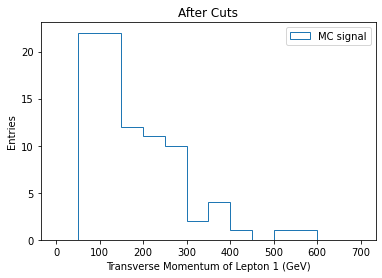

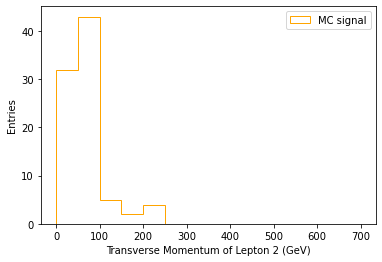

In [42]:
lep1PT_cut = []
lep2PT_cut = []
for i in prapidity_cut_df['lep_pt']:
    lep1PT_cut.append(i[0]*0.001)#decrease by a factor of 10^3 for TeV -> GeV
    lep2PT_cut.append(i[1]*0.001)
    
lep1PT_cut_hist = plt.hist(lep1PT_cut, bins=np.linspace(0,700,15), histtype='step', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 1 (GeV)')
plt.ylabel('Entries')
plt.title('After Cuts')
plt.legend()
plt.show()
lep2PT_cut_hist = plt.hist(lep2PT_cut, bins=np.linspace(0,700,15), histtype='step', color='orange', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 2 (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()

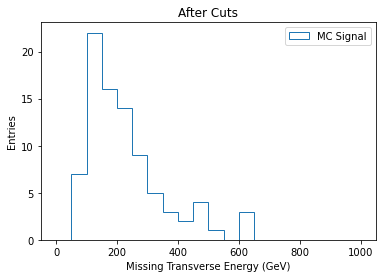

In [43]:
lepMET_hist = plt.hist(prapidity_cut_df['met_et']*0.001, bins=np.linspace(0,1000,21), histtype='step', label='MC Signal')
plt.xlabel('Missing Transverse Energy (GeV)')
plt.ylabel('Entries')
plt.title('After Cuts')
plt.legend()
plt.show()